# <center>Training Neural Nets Using Keras</center>

As multiple computing devices are introduced, and with internet more accessible in our daily lives, large data are captured as we use our computing devices to access social media or any other activities such as online shopping. These large amount of data could all be taken and analyzed for different kinds of tasks, for example: Amazon taking user logs in order to improve their personalized recommendation. With the large amount of data, feature engineering is much more hard and inefficient to learn.

Deep learning provides a new way that could help the learning of features from large data and also supports transfer learning. Deep learning are now used to solve different kinds of tasks such as image classification, image captioning, learning word embeddings, etc. Thus, in this tutorial, a Neural Network package that is used to set up Neural Network models would be introduced and we would learn how to use this package through solving a multi-label class classification problem.

## Overview
In this tutorial, it introduces a High-Level Neural Network (NN) Library - `Keras`, that allows us to train different kinds of NN models through an intuitional and easy way. Throughout the tutorial, it will cover the basic flow of how a neural network is trained and how different layers and functions in the `Keras` library could help the training process. 

The following would be the topics that are covered in the tutorial:<br>
- [Introduction to Keras](#Introduction-to-Keras)
- [Package Installation](#Package-Installation)
- [Neural Networks and Keras Model](#Neural-Networks-and-Keras-Model)
- [Example: Multi class classification](#Multi-class-classification)
- [Other applications](#Other-applications)


## Introduction to Keras
Why `Keras`?
`Keras` is a high-level neural network library that is written in Python. Since it is high-level, it means that it is simple to use and allows fast prototyping when you are trying to test a new neural network model. 

`Keras` could run on multiple backends such as `TensorFlow` and `Theano`. These two backends are low-level neural-network libraries that were designed for numerical computation and they both include GPU parallelism.

If you are interested in more details of `Keras` as its API, they could be found <a href="https://keras.io">here</a>

## Package Installation
The `Keras` library could be install by using `pip`:
```python
> pip install --upgrade keras
```
Since for this class we were recommended to use Anaconda, you could also install `Keras` by using the following command:
```python
> conda install keras
```
For this tutorial we would use `theano` as our backend, and since that the default backend for `Keras` is `Tensorflow`, we would need to change the configuration by the follow steps:

First go to the configuration file at `~/.keras/keras.json` and open it up: 
```python
> vim ~/.keras/keras.json
```
You could also create it if it wasn't already created, and fill in the default configuration :
```python
{
    "image_dim_ordering": "tf",
    "epsilon": 1e-07,
    "floatx": "float32",
    "backend": "tensorflow"
}
```
We would then change the field "backend" to "theano".

## Neural Networks and Keras Model
Before we start using the Keras package, we will first briefly introduce the structure of a basic neural network.
The following figure represents how a simple binary classifier could be structured in neural network:
<img src="structure.png" width="500">
For each nodes, they stand for a **neuron**. With one or more neurons together, they could define a **layer**.
We could see that there is a input layer, hidden layer and a output layer in the above figure. Note that for the output layer, there is only one node. This is because for this example, it represents a binary classifier, which would only involve with a binary output. Here we define this model as a **sequential model**. We would define this later on.
For each neurons of the hidden layers, they hold the weights for that node and these weights are trained and updated throught the training process of the neural network.

The next figure is a close look at how each **neuron** is designed:
<img src="neuron.png" width="500">
For each neuron, it takes the products of the inputs and the weights from the neurons that it came from and sum them up. After that, it then goes through an activation function. The **activation function** is usually non-linear, and so we say that the **neurons** act as multiple non-linear functions. 

After a simple introduction of the neural network, we would see how `Keras` let us build up a neural network easily.

## Multi class classification 
To show how `Keras` could be used, we will go through a multi-class classification task and learn the set up of the model in the meantime.

### Dataset 
For this problem, we would use the 20newsgroups dataset. This dataset contains 18000 posts on 20 different topics. To simplify the task, here we put the ones that are closely related into one group, for example: `rec.autos`,`rec.motorcycles`,`rec.sport.baseball`,`rec.sport.hockey` would be in the same group since they are all under the category `rec`. We could get the dataset from `scikit learn` package.


In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# group 0-3 rec group 4-7 sci group 8-11 talk
groups = [
    'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey',
    'sci.crypt','sci.electronics','sci.med','sci.space',
    'talk.politics.guns','talk.politics.mideast','talk.politics.misc','talk.religion.misc'
]
# remove other information from the post, and only retrieve the content
remove = ('headers', 'footers', 'quotes')
ng = fetch_20newsgroups(subset='all',categories = groups,remove=remove)

To have a better knowledge of the data that we have downloaded, we randomly select one and print it out. So for the total data, we have a size approximately of 10 thousand posts.

In [2]:
print ('Total number of posts : ',len(ng.data))
print ('Example of how the data looks like:\n',ng.data[10])
print ('\nExample of label:\n',ng.target[10])

Total number of posts :  11184
Example of how the data looks like:
 
Yes, Colin... I have to agree with you here...  I've put the puck in
my own net the same way Smith did... (only once, mind you :-) and it
was definitely my fault.  It is NOT a common play to play the puck the
way that Smith did.  

Luckily, for me...  when I did it... it was only a scrimmage :-)

Example of label:
 3


### Preprocessing of the data
The task we want to solve is a multi-class classification problem, and we could see from the raw label above, what we get is the number of which group it belongs to. Here we would want to do some preprocessing on the data, dividing them into training and testing data, and also turn the lable into a one-hot format. 

In [3]:
from sklearn.preprocessing import OneHotEncoder

# turn the input data into a one-hot format
def get_onehot_encode(data):
    data = np.reshape(data, (data.shape[0],1))
    encoder = OneHotEncoder()
    encoder.fit(data)
    return encoder.transform(data).toarray()

# Map the original group to the one that we have defined
def preprocess_category(target):
    new_group_list = []
    g=0
    for group in target:     
        if group <=3:# group 0-3 -> rec
            g = 0
        elif group >3 and group <=7:# group 4-7 -> sci
            g = 1
        else:# group 8-11 -> talk
            g = 2
        new_group_list.append(g)
    return new_group_list

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(stop_words='english',max_df=0.5,max_features=512)

X = vectorizer.fit_transform(ng.data).toarray()
temp_y= preprocess_category(ng.target)
y = get_onehot_encode(np.array(temp_y)) 

# Divide it into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print ('Training data size : ',X_train.shape)
print ('Training label size : ',y_train.shape)
print ('Testing data size :',X_test.shape)
print ('Testing lable size : ',y_test.shape)

Training data size :  (7828, 512)
Training label size :  (7828, 3)
Testing data size : (3356, 512)
Testing lable size :  (3356, 3)


### Setting up the model 
Now it's time to set up the Neural Network classifier. 
#### Sequential model
In `Keras` we call a linear stack of layers a sequential model. For your NN, you could simply add different kinds of **Layers** in your model. `Keras` support different kind of layers such as RNN, CNN, Dense etc. Different kinds of layers could be found <a href="https://keras.io/layers/core/">here</a>.
#### Activation Functions
`Keras` also have the activation functions defined for you. You could find predefined activation functions such as sigmoid, softmax, relu etc. in the <a href="https://keras.io/activations/">Keras documents</a>.

For our multi-class classification model, it would contain 1 input layer, 3 hidden layers and one output layer. For the activation function, we would all use the `relu` function for the hidden and input layer, and a `softmax` function for the output layer. 

In [5]:
from keras.layers import Dense, Activation
from keras.models import Sequential

# define a Sequential model
model = Sequential()
# add layers simply using 'add'
# only the input layer has to define the input_dim
# units is the number of neuron of the hidden layer
model.add(Dense(units=32, input_dim=512,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=3)) # output layer is 3, because we only have 3 classes
# softmax allows the output to be interpreted as the predicted probability of each group
model.add(Activation('softmax')) # Could also add activation layers like this

Using Theano backend.


#### Cost function 
Now we have the model, we need to define our loss function. Since for this example, we would like to solve a multi-class classification problem, we could minimize the cross entropy from the predicted output. `Keras` provides multiple loss function that you could use, but you could aslo define one yourself when necessary.

After the definition of the cost function, we would need to find a optimizer to solve our objective. Optimization algorithms such as SGD and RMSprop are useful and is also provided by the `Keras` packages.

In [6]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9) # default parameters
model.compile(loss='categorical_crossentropy', optimizer=sgd , metrics= ['accuracy'])# define objective and optimizer

#### Training and Testing 
Since both the Data and the model is now all set, we could start the training and testing of the model.

In [7]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,verbose=0,
                      validation_split=0.3, shuffle=True)
# see test results
total_loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ',total_loss)
print('Test accuracy: ',accuracy)

Test loss:  0.730204830082
Test accuracy:  0.727651966556


### Plotting the results 

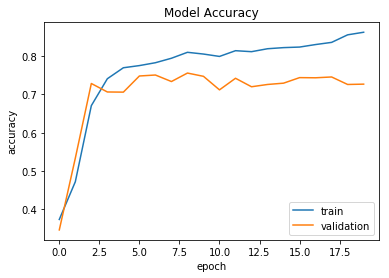

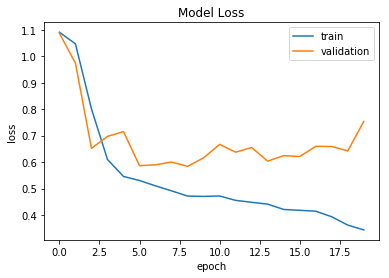

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


From the above figures, we could see that the loss of the validation set started to increase after between 5 epochs. This means that the model is starting to get overfitted after the 5th epoch. However, as we go on training, the final weights that we have recorded would not be the best weight for the model. So we need a mechanism to let us stop training at the 5th epoch. This could be done with the **EarlyStopping** callback function from the `Keras` package.

Test loss:  0.811859935842
Test accuracy:  0.732717520787


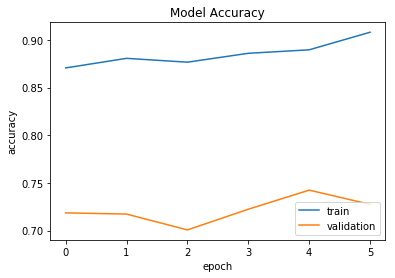

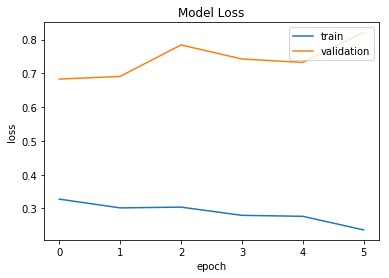

In [9]:
from keras.callbacks import EarlyStopping

# monitor- choose the value to moniter
# patience -  after number of epochs with no improvement, the training of the model will be stopped
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

# train the model again with early stop
history_early_stop= model.fit(X_train, y_train, epochs=20, batch_size=32,verbose=0,
                      validation_split=0.3, shuffle=True,callbacks=[early_stop])

# see test results
total_loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ',total_loss)
print('Test accuracy: ',accuracy)

plt.plot(history_early_stop.history['acc'])
plt.plot(history_early_stop.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history_early_stop.history['loss'])
plt.plot(history_early_stop.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Saving trained model and weights
Sometimes the Neural Network takes a long time to train for complex architectures. We could like to save the model and the trained weights for future usage, or else each time we would need to retrain the whole network again. The following are some ways to save your model and weights.

In [10]:
from keras.models import load_model
# This saves the whole model, including the architecture of the model, weights and the optimizer settings
model.save('model_multi_class.h5')  
del model

# reload the saved model and see whether the results are the same
new_model = load_model('model_multi_class.h5')
total_loss, accuracy = new_model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ',total_loss)
print('Test accuracy: ',accuracy)

Test loss:  0.811859935842
Test accuracy:  0.732717520787


In [11]:
from keras.models import model_from_json
from keras.utils import plot_model

# Only save the architecture
json_string = new_model.to_json()

# Only save the weights
new_model.save_weights('model_multi_class_weights.h5')
del new_model

# reload the model train the json file
model = model_from_json(json_string)
# reload the saved weights to the model
model.load_weights('model_multi_class_weights.h5')
# Note that you would need to the define the optimizers and compile settings again,
# since these information were not saved 

In [12]:
# you could plot the architecture of the model to see if it looks like what you have in mind
plot_model(model, to_file='model.png')

<img src="model.png" width="200">

## Other-applications 
For the example displayed we could see that Neural Network models could be used to solve classification problems. However, Neural Network could also be used to extract features from images and words. `Keras` provides `Convolutional Layers`, `Recurrent Layers` and also `Embedding Layers` for people to use according to different applications.

## References
All of the details for the usage of `Keras` could be found in the official documentation website: 
<a href="https://keras.io">Keras Document</a><br>
Further references for different kinds of Neural Network could be found n the following links:<br>
- Word Embeddings - Word2Vec : <a href="https://radimrehurek.com/gensim/models/word2vec.html">https://radimrehurek.com/gensim/models/word2vec.html</a><br>
- Recurrent Neural Network (LSTM): <a href="https://dl.acm.org/citation.cfm?id=1246450">https://dl.acm.org/citation.cfm?id=1246450</a><br>
- Convolutional Neural Network (ImageNet) : <a href="http://ieeexplore.ieee.org/document/5206848/">http://ieeexplore.ieee.org/document/5206848/</a><br>